In [1]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# DATA PREP

### Uploading the data

In [2]:
# df=pd.read_csv(r'C:\Users\dganit.haytner\Downloads\DS20\5. ML\Project3/tripadvisor_european_restaurants.csv')

In [ ]:
# df['country'].value_counts()

In [3]:
# germany_df = df[df['country'] == 'Germany']
# germany_df.index.name = 'index'
# germany_df.to_csv('germany.csv', index=True)

In [2]:
df=pd.read_csv(r'C:\Users\dganit.haytner\Downloads\DS20\5. ML\Project3/Germany.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115333 entries, 0 to 115332
Data columns (total 43 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   index                              115333 non-null  int64  
 1   restaurant_link                    115333 non-null  object 
 2   restaurant_name                    115333 non-null  object 
 3   original_location                  115333 non-null  object 
 4   country                            115333 non-null  object 
 5   region                             115330 non-null  object 
 6   province                           22862 non-null   object 
 7   city                               104477 non-null  object 
 8   address                            115333 non-null  object 
 9   latitude                           114458 non-null  float64
 10  longitude                          114458 non-null  float64
 11  claimed                            1150

### Float / Integer Columns - First Look

In [4]:
float_columns = df.select_dtypes(include='float64').columns.tolist()
print(float_columns)

['latitude', 'longitude', 'open_days_per_week', 'open_hours_per_week', 'working_shifts_per_week', 'avg_rating', 'total_reviews_count', 'reviews_count_in_default_language', 'excellent', 'very_good', 'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere']


In [5]:
df.describe().round(2)


,index,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,115333.00,114458.00,114458.00,57658.00,57658.00,57658.00,101811.00,105672.00,101949.00,101949.00,101949.00,101949.00,101949.00,101949.00,51838.00,52426.00,52239.00,16321.00
mean,242746.00,50.70,9.73,6.24,60.58,7.39,4.06,38.23,10.84,5.26,3.29,1.15,0.51,0.64,4.09,4.04,3.98,3.99
std,33293.91,1.84,2.15,0.97,25.17,2.45,0.69,142.72,53.54,25.51,17.99,6.79,2.50,3.13,0.54,0.56,0.54,0.50
min,185080.00,46.88,5.89,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.50
25%,213913.00,49.23,8.07,6.00,42.00,6.00,3.50,4.00,1.00,1.00,0.00,0.00,0.00,0.00,4.00,3.50,3.50,3.50
50%,242746.00,50.80,9.37,6.00,58.50,7.00,4.00,12.00,4.00,2.00,1.00,0.00,0.00,0.00,4.00,4.00,4.00,4.00
75%,271579.00,52.20,11.45,7.00,77.00,7.00,4.50,35.00,9.00,4.00,3.00,1.00,0.00,1.00,4.50,4.50,4.50,4.50
max,300412.00,55.04,15.00,7.00,167.88,15.00,5.00,30142.00,11997.00,5110.00,4091.00,1682.00,525.00,589.00,5.00,5.00,5.00,5.00


### Object Columns - Exploring

In [6]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)

['restaurant_link', 'restaurant_name', 'original_location', 'country', 'region', 'province', 'city', 'address', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'vegetarian_friendly', 'vegan_options', 'gluten_free', 'original_open_hours', 'default_language', 'keywords']


In [7]:
df[object_columns].head()


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,claimed,awards,...,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,default_language,keywords
0,g10003091-d11612334,Gassles Stuble,"[""Europe"", ""Germany"", ""Baden-Wurttemberg"", ""He...",Germany,Baden-Wurttemberg,NaN,Hessigheim,"Mittelgasse 1, 74394 Hessigheim, Baden-Württem...",Unclaimed,NaN,...,"Dinner, Lunch","Pub, Gastropub, German, European",NaN,"Reservations, Seating, Table Service",N,N,N,NaN,English,NaN
1,g10003091-d9736870,Schreyerhof,"[""Europe"", ""Germany"", ""Baden-Wurttemberg"", ""He...",Germany,Baden-Wurttemberg,NaN,Hessigheim,"Schreyerhof 30, 74394 Hessigheim, Baden-Württe...",Unclaimed,NaN,...,Dinner,German,Vegetarian Friendly,NaN,Y,N,N,NaN,English,NaN
2,g10038925-d7392445,Restaurant 1850,"[""Europe"", ""Germany"", ""Saxony"", ""Lengenfeld"", ...",Germany,Saxony,Lengenfeld,Schoenbrunn,"Hauptstr. 4, 08485 Schoenbrunn, Lengenfeld, Sa...",Claimed,NaN,...,"Lunch, Dinner",Fusion,NaN,Reservations,N,N,N,"{""Mon"": [], ""Tue"": [], ""Wed"": [""11:30-14:30"", ...",All languages,NaN
3,g10045420-d21369853,Schmidtburger Hof,"[""Europe"", ""Germany"", ""Rhineland-Palatinate"", ...",Germany,Rhineland-Palatinate,NaN,Weiler bei Monzingen,"Hauptstrasse 20, 55627 Weiler bei Monzingen, R...",Unclaimed,NaN,...,NaN,German,NaN,NaN,N,N,N,NaN,NaN,NaN
4,g10051449-d1950208,Romantik Hotel Alte Vogtei,"[""Europe"", ""Germany"", ""Rhineland-Palatinate"", ...",Germany,Rhineland-Palatinate,NaN,Hamm (Sieg),"Lindenallee 3, 57577 Hamm (Sieg), Rhineland-Pa...",Claimed,NaN,...,NaN,"French, German",Vegetarian Friendly,NaN,Y,N,N,NaN,English,NaN


In [7]:
import pandas as pd
import re

object_to_write = df.select_dtypes(include='object').columns
# restaurant_link, restaurant_name - unique values
object_to_write = [col for col in object_to_write if col not in ['restaurant_link', 'restaurant_name']]
total_records = len(df)

# Create an Excel writer object
with pd.ExcelWriter('object_value_counts.xlsx') as writer:
    written_sheets = []
    
    for col in object_to_write:
        # Get value counts as a DataFrame
        vc = df[col].value_counts(dropna=False)
        vc_df = vc.reset_index()
        vc_df.columns = [col, 'count']
        vc_df['%'] = (vc_df['count'] / total_records * 100).round(0)
        
        # Clean and limit sheet name
        sheet_name = re.sub(r'[:\\/?*\[\]]', '_', col)[:31]
        
        # Handle duplicate sheet names
        if sheet_name in written_sheets:
            sheet_name += f"_{len(written_sheets)}"
        written_sheets.append(sheet_name)
        
        # Write to Excel
        vc_df.to_excel(writer, sheet_name=sheet_name, index=False)

    print("Sheets written:", written_sheets)

    # Ensure at least one sheet is written
    if not written_sheets:
        pd.DataFrame({"Message": ["No object columns found."]}).to_excel(writer, sheet_name="Info", index=False)


Sheets written: ['original_location', 'country', 'region', 'province', 'city', 'address', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'vegetarian_friendly', 'vegan_options', 'gluten_free', 'original_open_hours', 'default_language', 'keywords']


### Text Columns Handle - Before Bulk Punctuation Removal

### Overlapping Text Columns

In [8]:
import string

In [10]:
# !pip install spacy

In [8]:
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 3.7 MB/s eta 0:00:04
     ------------------ --------------------- 5.8/12.8 MB 19.7 MB/s eta 0:00:01
     ------------------------------------ -- 12.1/12.8 MB 22.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 21.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Text Columns ['cuisines', 'features', 'keywords', 'top_tags'] 
# there is an overlapp between the cols (repeating tags)
# Combining 4 columns to one text column (to avoid duplicates / override)
''' 
Examples:
'cuisines' - "Pub, Gastropub, German, European"
'features' - "Reservations, Seating, Table Service"
'keywords' - "milk, phone, allergies, gluten, portions"
'top_tags' - "Mid-range, German, European, Pub"
'''

''' 
Handle:
Missing value handling
Lowercasing
Removing punctuation/special characters
Stripping extra spaces
Optional stopword removal
Tokenization
Lemmatization
'''


# =========================================================
# 📦 1. Import
# =========================================================
import spacy

# =========================================================
# 🧠 2. Load spaCy English model
# =========================================================
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # faster: keep only tokenizer + tagger + lemmatizer


# =========================================================
# 🧩 4. Merge the four text columns
# =========================================================
df["merged_text"] = (
    df[["cuisines", "features", "keywords", "top_tags"]]
    .fillna('')          # handle missing values
    .agg(' '.join, axis=1)
)

# =========================================================
# 🧼 5. Define spaCy-based cleaning + lemmatization function
# =========================================================
def clean_with_spacy(text):
    """
    Clean text using SpaCy:
    - Lowercase
    - Remove punctuation/special characters
    - Remove stopwords
    - Keep alphabetic tokens only
    - Lemmatize                 - Reduces noise: treats “service”, “services”, and “servicing” as the same token
    - Remove duplicate words (keeps order)
    """
    if not isinstance(text, str):
        return ""
    
    doc = nlp(text.lower())
    
    # Lemmatize and remove stopwords/punctuation
    cleaned_tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop
    ]
    
    # Remove duplicates while keeping order
    cleaned_tokens = list(dict.fromkeys(cleaned_tokens))
    
    return ' '.join(cleaned_tokens)


# =========================================================
# 🚀 6. Apply cleaning function
# =========================================================
df["clean_text"] = df["merged_text"].apply(clean_with_spacy)

# =========================================================
# 🔍 7. Inspect cleaned text
# =========================================================
print(df[["merged_text", "clean_text"]])



                                              merged_text  \
0       Pub, Gastropub, German, European Reservations,...   
1         German   Mid-range, German, Vegetarian Friendly   
2                  Fusion Reservations  Mid-range, Fusion   
3                              German   Mid-range, German   
4       French, German   Mid-range, French, German, Ve...   
...                                                   ...   
115328          German, Diner   Cheap Eats, German, Diner   
115329    German   Mid-range, German, Vegetarian Friendly   
115330        Italian, Pizza Reservations  Italian, Pizza   
115331  European, Central European Reservations, Seati...   
115332  American   Mid-range, American, Vegetarian Fri...   

                                               clean_text  
0       pub gastropub german european reservation seat...  
1                    german mid range vegetarian friendly  
2                            fusion reservation mid range  
3                          

In [11]:
# df.drop(columns=["cuisines", "features", "keywords", "top_tags", "merged_text"], inplace=True)

### Open Hours Text Column - Extracting Info

In [10]:
# original_open_hours - extracting info
''' example:
{"Mon": [], "Tue": [], "Wed": ["11:30-14:30", "17:30-22:00"], 
 "Thu": ["11:30-14:30", "17:30-22:00"], "Fri": ["11:30-14:30", "17:30-22:00"], 
 "Sat": ["11:30-14:30", "17:30-22:00"], "Sun": ["11:30-14:30", "17:30-22:00"]}
 '''

# 1. Parse the String to Dictionary
import ast

def safe_literal_eval(val):
    if pd.isna(val):  # handles NaN or None
        return None
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return None  # or val if you prefer to keep the original string


df['parsed_hours'] = df['original_open_hours'].apply(safe_literal_eval)
print(df[['original_open_hours','parsed_hours']].head())

                                 original_open_hours  \
0                                                NaN   
1                                                NaN   
2  {"Mon": [], "Tue": [], "Wed": ["11:30-14:30", ...   
3                                                NaN   
4                                                NaN   

                                        parsed_hours  
0                                               None  
1                                               None  
2  {'Mon': [], 'Tue': [], 'Wed': ['11:30-14:30', ...  
3                                               None  
4                                               None  


In [14]:
# 2. Transform into Useful Features

In [11]:
# Total hours per week - already exists 
# Total days per week -  already exists 
# Total shifts per week -  already exists 
print(df[['open_hours_per_week','open_days_per_week','working_shifts_per_week']].head())

   open_hours_per_week  open_days_per_week  working_shifts_per_week
0                  NaN                 NaN                      NaN
1                  NaN                 NaN                      NaN
2                 37.5                 5.0                     10.0
3                  NaN                 NaN                      NaN
4                  NaN                 NaN                      NaN


In [18]:
# 🕙 Open on Weekends?

df['open_weekends'] = df['parsed_hours'].apply(
    lambda x: (
        int(bool(x.get('Sat') or x.get('Sun')))
        if isinstance(x, dict)
        else np.nan  # if it's missing or not a dict → NaN
    )
)

print(df[['open_weekends']].value_counts())

open_weekends
1.0              56270
0.0               1388
Name: count, dtype: int64


In [19]:
#  Binary Columns for Each Day (Open/Closed)
'''
isinstance(x, dict) → makes sure we only try .get(day) on valid dictionary rows.
else 0 → if x is None or not a dict, it safely returns 0 (meaning "closed").
int(bool(...)) → converts True/False to 1/0.
'''

for day in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']:
    df[f'open_{day.lower()}'] = df['parsed_hours'].apply(
        lambda x: int(bool(x.get(day))) if isinstance(x, dict) else np.nan
    )
print(df[['open_mon', 'open_tue', 'open_wed', 'open_thu', 'open_fri', 'open_sat', 'open_sun']].head(5))


   open_mon  open_tue  open_wed  open_thu  open_fri  open_sat  open_sun
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN
2       0.0       0.0       1.0       1.0       1.0       1.0       1.0
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN


In [20]:
# --- Time of Day based binary features ---
'''
Time of Day	Typical Hours (24h)
Morning	    06:00–11:00	Frühstück / Frühstückszeit (breakfast)	Cafés, bakeries mostly
Noon	    11:00–14:00	Mittagessen (lunch)	Lunch service window
Afternoon	14:00–17:30	Kaffee & Kuchen (coffee & cake)	Some restaurants close briefly between lunch and dinner
Evening	    17:30–22:00	Abendessen (dinner)	Main restaurant hours
Late	    ≥22:00	    Late-night dining / bars	Often limited to bars, Döner, or pizza places
'''

def extract_time_features(parsed):
    # Define all possible time features
    times = {
        'open_morning': np.nan,    # 6–11
        'open_noon': np.nan,       # 11–14
        'open_afternoon': np.nan,  # 14–17.5
        'open_evening': np.nan,    # 17.5–22
        'open_late': np.nan        # >=22
    }

    # If the input isn't a valid dict (e.g. missing or invalid), return NaNs
    if not isinstance(parsed, dict):
        return pd.Series(times)

    # If it *is* a dict, start with zeros (now we know we have valid data)
    times = {k: 0 for k in times}

    for day, ranges in parsed.items():
        if isinstance(ranges, str):
            ranges = [ranges]

        for r in ranges:
            try:
                start, end = r.split('-')
                start_hour = float(start.split(':')[0])
                end_hour = float(end.split(':')[0])

                # Morning: 6–11
                if start_hour < 11 and end_hour > 6:
                    times['open_morning'] = 1

                # Noon: 11–14
                if start_hour < 14 and end_hour > 11:
                    times['open_noon'] = 1

                # Afternoon: 14–17.5
                if start_hour < 17.5 and end_hour > 14:
                    times['open_afternoon'] = 1

                # Evening: 17.5–22
                if start_hour < 22 and end_hour > 17.5:
                    times['open_evening'] = 1

                # Late: ≥22
                if end_hour >= 22:
                    times['open_late'] = 1

            except Exception:
                continue

    return pd.Series(times)


df[['open_morning', 'open_noon', 'open_afternoon', 'open_evening', 'open_late']] = (
    df['parsed_hours'].apply(extract_time_features)
)

# --- Preview results ---
print(df[['open_morning', 'open_noon', 'open_afternoon', 'open_evening', 'open_late']].head())


   open_morning  open_noon  open_afternoon  open_evening  open_late
0           NaN        NaN             NaN           NaN        NaN
1           NaN        NaN             NaN           NaN        NaN
2           0.0        1.0             1.0           1.0        1.0
3           NaN        NaN             NaN           NaN        NaN
4           NaN        NaN             NaN           NaN        NaN


In [18]:
# df = df.drop(['original_open_hours', 'parsed_hours'], axis=1)

### Object Columns - Bulk Punctuation Removal

In [21]:
# REDEFINE the list after drops
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)

['restaurant_link', 'restaurant_name', 'original_location', 'country', 'region', 'province', 'city', 'address', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'vegetarian_friendly', 'vegan_options', 'gluten_free', 'original_open_hours', 'default_language', 'keywords', 'merged_text', 'clean_text', 'parsed_hours']


In [22]:
for col in object_columns:
    df[col] = df[col].astype("string")  # Convert object columns to string type
object_columns  

['restaurant_link',
 'restaurant_name',
 'original_location',
 'country',
 'region',
 'province',
 'city',
 'address',
 'claimed',
 'awards',
 'popularity_detailed',
 'popularity_generic',
 'top_tags',
 'price_level',
 'price_range',
 'meals',
 'cuisines',
 'special_diets',
 'features',
 'vegetarian_friendly',
 'vegan_options',
 'gluten_free',
 'original_open_hours',
 'default_language',
 'keywords',
 'merged_text',
 'clean_text',
 'parsed_hours']

In [23]:
string_df = df[object_columns].astype(str) # Convert specified columns to string type and create string_df
print(string_df.columns.tolist())

['restaurant_link', 'restaurant_name', 'original_location', 'country', 'region', 'province', 'city', 'address', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'vegetarian_friendly', 'vegan_options', 'gluten_free', 'original_open_hours', 'default_language', 'keywords', 'merged_text', 'clean_text', 'parsed_hours']


In [24]:
# Remove punctuation in one line
string_df = string_df.applymap(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
string_df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,claimed,awards,...,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,default_language,keywords,merged_text,clean_text,parsed_hours
0,g10003091d11612334,Gassles Stuble,Europe Germany BadenWurttemberg Hessigheim,Germany,BadenWurttemberg,NA,Hessigheim,Mittelgasse 1 74394 Hessigheim BadenWürttember...,Unclaimed,NA,...,Reservations Seating Table Service,N,N,N,NA,English,NA,Pub Gastropub German European Reservations Sea...,pub gastropub german european reservation seat...,NA
1,g10003091d9736870,Schreyerhof,Europe Germany BadenWurttemberg Hessigheim,Germany,BadenWurttemberg,NA,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,Unclaimed,NA,...,NA,Y,N,N,NA,English,NA,German Midrange German Vegetarian Friendly,german mid range vegetarian friendly,NA
2,g10038925d7392445,Restaurant 1850,Europe Germany Saxony Lengenfeld Schoenbrunn,Germany,Saxony,Lengenfeld,Schoenbrunn,Hauptstr 4 08485 Schoenbrunn Lengenfeld Saxony...,Claimed,NA,...,Reservations,N,N,N,Mon Tue Wed 11301430 17302200 Thu 11301430 1...,All languages,NA,Fusion Reservations Midrange Fusion,fusion reservation mid range,Mon Tue Wed 11301430 17302200 Thu 11301430 1...
3,g10045420d21369853,Schmidtburger Hof,Europe Germany RhinelandPalatinate Weiler bei ...,Germany,RhinelandPalatinate,NA,Weiler bei Monzingen,Hauptstrasse 20 55627 Weiler bei Monzingen Rhi...,Unclaimed,NA,...,NA,N,N,N,NA,NA,NA,German Midrange German,german mid range,NA
4,g10051449d1950208,Romantik Hotel Alte Vogtei,Europe Germany RhinelandPalatinate Hamm Sieg,Germany,RhinelandPalatinate,NA,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,Claimed,NA,...,NA,Y,N,N,NA,English,NA,French German Midrange French German Vegetar...,french german mid range vegetarian friendly,NA


In [25]:
# Assign the cleaned columns back to the original DataFrame
df[object_columns] = string_df

In [26]:
df[object_columns].head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,claimed,awards,...,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,default_language,keywords,merged_text,clean_text,parsed_hours
0,g10003091d11612334,Gassles Stuble,Europe Germany BadenWurttemberg Hessigheim,Germany,BadenWurttemberg,NA,Hessigheim,Mittelgasse 1 74394 Hessigheim BadenWürttember...,Unclaimed,NA,...,Reservations Seating Table Service,N,N,N,NA,English,NA,Pub Gastropub German European Reservations Sea...,pub gastropub german european reservation seat...,NA
1,g10003091d9736870,Schreyerhof,Europe Germany BadenWurttemberg Hessigheim,Germany,BadenWurttemberg,NA,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,Unclaimed,NA,...,NA,Y,N,N,NA,English,NA,German Midrange German Vegetarian Friendly,german mid range vegetarian friendly,NA
2,g10038925d7392445,Restaurant 1850,Europe Germany Saxony Lengenfeld Schoenbrunn,Germany,Saxony,Lengenfeld,Schoenbrunn,Hauptstr 4 08485 Schoenbrunn Lengenfeld Saxony...,Claimed,NA,...,Reservations,N,N,N,Mon Tue Wed 11301430 17302200 Thu 11301430 1...,All languages,NA,Fusion Reservations Midrange Fusion,fusion reservation mid range,Mon Tue Wed 11301430 17302200 Thu 11301430 1...
3,g10045420d21369853,Schmidtburger Hof,Europe Germany RhinelandPalatinate Weiler bei ...,Germany,RhinelandPalatinate,NA,Weiler bei Monzingen,Hauptstrasse 20 55627 Weiler bei Monzingen Rhi...,Unclaimed,NA,...,NA,N,N,N,NA,NA,NA,German Midrange German,german mid range,NA
4,g10051449d1950208,Romantik Hotel Alte Vogtei,Europe Germany RhinelandPalatinate Hamm Sieg,Germany,RhinelandPalatinate,NA,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,Claimed,NA,...,NA,Y,N,N,NA,English,NA,French German Midrange French German Vegetar...,french german mid range vegetarian friendly,NA


### Narrowing Categories

In [27]:
df['region'].value_counts()

region
Bavaria                      21531
North RhineWestphalia        21116
BadenWurttemberg             16236
Hesse                         9845
Lower Saxony                  9232
Berlin                        7217
RhinelandPalatinate           6651
Saxony                        4510
SchleswigHolstein             4206
Hamburg                       3625
MecklenburgWest Pomerania     2634
Brandenburg                   2378
Thuringia                     1986
SaxonyAnhalt                  1799
Saarland                      1302
State of Bremen               1062
NA                               3
Name: count, dtype: int64

In [28]:
# Districts Unification
# Based on common geographic and cultural characteristics
df['region'] = df['region'].replace({
    'Bavaria': "Southern Germany",
    'BadenWurttemberg': "Southern Germany",    
    'North RhineWestphalia': "Rhineland‑West",    
    'RhinelandPalatinate': "Rhineland‑West",    
    'Saarland': "Rhineland‑West",    
    'Hesse': "Central Germany",    
    'Thuringia': "Central Germany",
    'SaxonyAnhalt': "Central Germany",    
    'SchleswigHolstein': "Northern and Hanseatic Coast",    
    'Hamburg': "Northern and Hanseatic Coast",    
    'State of Bremen': "Northern and Hanseatic Coast",    
    'Lower Saxony': "Northern and Hanseatic Coast",      
    'MecklenburgWest Pomerania': "Northern and Hanseatic Coast",
    'Brandenburg': "Eastern Germany",    
    'Saxony': "Eastern Germany",    
    'Berlin': "Berlin"
})        

In [29]:
df['region'].value_counts()

region
Southern Germany                37767
Rhineland‑West                  29069
Northern and Hanseatic Coast    20759
Central Germany                 13630
Berlin                           7217
Eastern Germany                  6888
NA                                  3
Name: count, dtype: int64

In [30]:
# check
# filtering rows in df where the region column does NOT match any of the listed regions.
df[ ~ df['region'].isin([
    'Southern Germany',
    'Rhineland‑West',
    'Northern and Hanseatic Coast',
    'Central Germany',
    'Berlin',
    'Eastern Germany'
]) ]

,index,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,...,open_wed,open_thu,open_fri,open_sat,open_sun,open_morning,open_noon,open_afternoon,open_evening,open_late
20708,205788,g187275d21012700,Gasthof Fränkische Schweiz,Europe Germany,Germany,NA,NA,NA,Kirchahorn 15 95491 Germany,49.833340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20709,205789,g187275d21321660,Gaststätte zum Westerwald,Europe Germany,Germany,NA,NA,NA,Hauptstrasse Kadenbach 56337 Germany,50.385895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20710,205790,g187275d21348834,Hofcafe,Europe Germany,Germany,NA,NA,NA,Siedlungsweg 4 18195 Germany,51.487316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Filling Missing Region and City
# Using Web Search

#address == 'Kirchahorn 15 95491 Germany'
df.loc[ df['address'].str.contains('Kirchahorn', na=False), 'city' ] = 'Ahorntal'
df.loc[ df['address'].str.contains('Kirchahorn', na=False), 'region' ] = 'Southern Germany'
df.loc[ df['address'].str.contains('Kirchahorn', na=False), 'address' ] = 'Kirchahorn 15 95491 Ahorntal Germany'

# address == 'Hauptstrasse Kadenbach 56337 Germany'
df.loc[ df['address'] == 'Hauptstrasse Kadenbach 56337 Germany', 'region' ] = 'Rhineland‑West'
df.loc[ df['address'] == 'Hauptstrasse Kadenbach 56337 Germany', 'city' ] = 'Kadenbach'

# address == 'Siedlungsweg 4 18195 Germany'
df.loc[ df['address'] == 'Siedlungsweg 4 18195 Germany', 'city' ] = 'Cammin'
df.loc[ df['address'] == 'Siedlungsweg 4 18195 Germany', 'region' ] = 'Northern and Hanseatic Coast'
df.loc[ df['address'] == 'Siedlungsweg 4 18195 Cammin Germany', 'address' ] = 'Siedlungsweg 4 18195 Cammin German'

In [32]:
df['region'].value_counts()


region
Southern Germany                37768
Rhineland‑West                  29070
Northern and Hanseatic Coast    20760
Central Germany                 13630
Berlin                           7217
Eastern Germany                  6888
Name: count, dtype: int64

In [33]:
df['city'].value_counts()

city
NA            10853
Munich         3508
Cologne        2399
Frankfurt      2325
Dusseldorf     1683
              ...  
Serrig            1
Enniger           1
Erpfingen         1
Bischweier        1
Steigerts         1
Name: count, Length: 7081, dtype: int64

In [32]:
# city
# NA            10853       # ~10% to be filled in

In [34]:
# Dropping a high missing feature 

province_percent_na_total = df['province'].isna().sum() + (df['province'] == 'NA').sum()
province_percent_na_total = province_percent_na_total / len(df) * 100
print(f"Percentage of missing or 'NA' values in 'province': {province_percent_na_total:.2f}%")


'''
There’s no “province” field in German addresses.
Instead, cities are identified by their state (Bundesland)
'''
# Percentage of missing or 'NA' values in 'province': 80.18%
df = df.drop('province', axis=1)  


Percentage of missing or 'NA' values in 'province': 80.18%


In [35]:
df['claimed'].value_counts()

claimed
Unclaimed    87584
Claimed      27509
NA             240
Name: count, dtype: int64

In [36]:
'''
claimed - 
On Tripadvisor, “claimed” or saying a listing is “claimed” means that 
the business owner or someone officially affiliated with the business 
has asserted ownership of that listing.
'''

df['claimed'] = df['claimed'].replace({
    'Unclaimed': 0,
    'Claimed': 1
})

df['claimed'] = pd.to_numeric(df['claimed'], errors='coerce')
df['claimed']

0         0.0
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
115328    0.0
115329    1.0
115330    0.0
115331    0.0
115332    1.0
Name: claimed, Length: 115333, dtype: float64

In [40]:
# awards

# Example:
# "Travellers' Choice, Certificate of Excellence 2020, Certificate of Excellence 2019"

'''
Extracting type of award:
Michelin /
Travellers’ Choice /
Certificate of Excellence
'''
award_patterns = {
    'michelin': 'michelin',
    'travellers_choice': 'travellers choic',
    'certificate_of_excellence': 'certificate of excellence'
}

for col, pattern in award_patterns.items():
    df[col] = df['awards'].apply(
        lambda x: (
            1 if isinstance(x, str) and pattern in x.lower().strip() and x.strip() != ''
            else np.nan if (pd.isna(x) or x == '')
            else 0
        )
    )


In [41]:
df['michelin'].value_counts()

michelin
0    113962
1      1371
Name: count, dtype: int64

In [42]:
df['travellers_choice'].value_counts()

travellers_choice
0    110542
1      4791
Name: count, dtype: int64

In [43]:
df['certificate_of_excellence'].value_counts()

certificate_of_excellence
0    103820
1     11513
Name: count, dtype: int64

In [45]:
# Sum the award columns
df['awards_num'] = df[['michelin', 'travellers_choice', 'certificate_of_excellence']].sum(axis=1, skipna=True)

# If all three are missing, set awards_num to NaN
mask_all_missing = df[['michelin', 'travellers_choice', 'certificate_of_excellence']].isna().all(axis=1)
df.loc[mask_all_missing, 'awards_num'] = np.nan
df['awards_num'].value_counts()

awards_num
0.0    102449
1.0      8093
2.0      4791
Name: count, dtype: int64

In [46]:
# Creating a categorical col (0 - no prize, 1 - any prize)

# Condition: any award is 1
condition_any_award = (
    (df['michelin'] == 1) | 
    (df['travellers_choice'] == 1) | 
    (df['certificate_of_excellence'] == 1)
)

# Default assignment using np.select
df['awards_any'] = np.select([condition_any_award], [1], default=0)

# Set rows where all three award columns are missing to NaN
mask_all_missing = df[['michelin', 'travellers_choice', 'certificate_of_excellence']].isna().all(axis=1)
df.loc[mask_all_missing, 'awards_any'] = np.nan

df['awards_any'].value_counts()

awards_any
0.0    102449
1.0     12884
Name: count, dtype: int64

In [47]:
# prize prestige 
# an ordinal col
# not necessarily implies the ratio between the prizes

''' 
Michelin ≈ strongest elite signal,
Travellers’ Choice ≈ strong user sentiment signal,
Certificate of Excellence ≈ moderate stability signal. 

Each record in df['awards'] might contain one or more of: 'Michelin', 'Travellers Choice', 'Certificate of Excellence'.
Priority:
Michelin > Travellers Choice > Certificate of Excellence
Default: '0' (if none appears)
'''

def get_awards_level(value):
    # Treat missing or empty as missing
    if pd.isna(value) or value == '':
        return np.nan
    
    text = str(value)
    
    if 'Michelin' in text:
        return '3'
    elif 'Travellers Choic' in text:
        return '2'
    elif 'Certificate of Excellence' in text:
        return '1'
    else:
        return '0'

df['awards_level'] = df['awards'].apply(get_awards_level)

df['awards_level'].value_counts()

awards_level
0    102449
1      7106
2      4407
3      1371
Name: count, dtype: int64

In [48]:
df.iloc[26][['awards','awards_level']]

awards          Travellers Choice Certificate of Excellence 20...
awards_level                                                    2
Name: 26, dtype: object

In [49]:
import re

# extracting recency of award
def awards_latest_year(text):
    if pd.isnull(text):
        return 0
    years = re.findall(r'\b(20\d{2}|19\d{2})\b', text)
    return max([int(y) for y in years]) if years else 0

df['awards_latest_year'] = df['awards'].apply(awards_latest_year)
df['awards_latest_year'] = df['awards_latest_year'].apply(lambda x: x - 2000 if x > 2000 else x)  # lowering scale
df['awards_latest_year'] = df['awards_latest_year'].astype(int)

df['awards_latest_year'].value_counts()

awards_latest_year
0     102449
20      5778
17      2178
18      2067
19      1939
16       537
11       115
13        96
15        95
14        56
12        23
Name: count, dtype: int64

In [50]:
# FACTOR 
# for both prestige and recency
# a numeric col 

'''
Michelin: '3' > Travellers Choice: '2' > Certificate of Excellence: '1' > None: '0' 
multiplied by year.
"Michelin 2020, Travellers Choice, Certificate of Excellence 2019"    = 60    # 3 * (2020-2000)
'''
def map_text_to_number(s):
    # Treat missing or empty as missing
    if not isinstance(s, str) or not s.strip():
        return np.nan  # previously 0, now missing

    # Priority order
    for key, factor in [('Michelin', 3), ('Travellers Choice', 2), ('Certificate of Excellence', 1)]:
        match = re.search(rf'{key}\s*(\d+)', s)
        if match:
            year = int(match.group(1))
            return factor * (year - 2000)
        elif key == 'Travellers Choice' and re.search(r'Travellers Choice', s, re.IGNORECASE):
            # If "Travellers Choice" is present but no year, use default 2020
            year = 2020
            return factor * (year - 2000)

    return 0  # text present but no matching award


df['awards_factor'] = df['awards'].apply(map_text_to_number)
df['awards_factor'].value_counts()    

awards_factor
0     102449
40      4407
17      2178
18      2067
19      1939
60      1371
16       537
11       115
13        96
15        95
14        56
12        23
Name: count, dtype: int64

In [51]:
df[df['awards_factor'] == 60][['awards','awards_level', 'awards_latest_year', 'awards_factor']].head(5)  # all are Michelin 2020

,awards,awards_level,awards_latest_year,awards_factor
218,Michelin 2020 for Bib Gourmand good quality go...,3,20,60
259,Travellers Choice Michelin 2020 for The Michel...,3,20,60
272,Michelin 2020 for One Michelin Star High quali...,3,20,60
479,Michelin 2020 for Bib Gourmand good quality go...,3,20,60
482,Michelin 2020 for Bib Gourmand good quality go...,3,20,60


In [52]:
df[df['awards_factor'] == 40][['awards','awards_level', 'awards_latest_year', 'awards_factor']].head(5)  # all are Travellers Choice

,awards,awards_level,awards_latest_year,awards_factor
26,Travellers Choice Certificate of Excellence 20...,2,20,40
84,Travellers Choice Certificate of Excellence 20...,2,20,40
95,Travellers Choice Certificate of Excellence 20...,2,20,40
136,Travellers Choice Certificate of Excellence 20...,2,20,40
276,Travellers Choice Certificate of Excellence 20...,2,20,40


In [61]:
# df = df.drop('awards', axis=1)  

In [53]:
# default_language
# not the language of the restaurant, but the language scope of the reviews 

df['default_language'].value_counts()

default_language
English          60196
All languages    41753
NA               13384
Name: count, dtype: int64

In [54]:
# Map the known categories
language_map = {
    'English': "1",
    'All languages': "2"
}

# Apply mapping
df['default_language'] = df['default_language'].map(language_map)

# Keep missing values as missing
# If there are rows that were 'NA' as string, optionally treat as missing too
df['default_language'] = df['default_language'].replace({'NA': np.nan})

df['default_language'].value_counts()

default_language
1    60196
2    41753
Name: count, dtype: int64

In [55]:
ct = (pd.crosstab(df['default_language'], df['region'], normalize='columns') * 100).round(0)
ct
# '2' implies for a diverse, international audience

region,Berlin,Central Germany,Eastern Germany,Northern and Hanseatic Coast,Rhineland‑West,Southern Germany
default_language,,,,,,
1,84.0,58.0,49.0,55.0,56.0,61.0
2,16.0,42.0,51.0,45.0,44.0,39.0


In [56]:
# Check
df.groupby('default_language')['avg_rating'].mean()  # avg_rating = target value
# no meaningful diifference

default_language
1    4.046248
2    4.074269
Name: avg_rating, dtype: float64

In [57]:
# binary vars Y / N

def convert_binary_NY_to_int(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Convert values 'N' → 0, 'Y' → 1 in column `col` of df, preserving missing values.
    Uses nullable integer dtype (Int64).
    """
    df[col] = df[col].replace({'N': 0, 'Y': 1})
    df[col] = df[col].astype('Int64')  # nullable integer
    return df

# Apply to columns
df = convert_binary_NY_to_int(df, 'vegetarian_friendly')
df = convert_binary_NY_to_int(df, 'vegan_options')
df = convert_binary_NY_to_int(df, 'gluten_free')

In [58]:
df[['vegetarian_friendly']].value_counts()

vegetarian_friendly
0                      74138
1                      41195
Name: count, dtype: int64

In [59]:
df[['vegan_options']].value_counts()

vegan_options
0                106347
1                  8986
Name: count, dtype: int64

In [60]:
df[['gluten_free']].value_counts()

gluten_free
0              111199
1                4134
Name: count, dtype: int64

In [65]:
# price_range

# Example: €14€59   # €14-€59 before punctuation removal

# extract two numbers in the string, then compute the midpoint.

def midpoint_of_range(rng_str):
    if pd.isna(rng_str) or not str(rng_str).strip():
        return pd.NA  # preserve missing
    # Find all numeric parts (integers or decimals)
    nums = re.findall(r"\d+(?:\.\d+)?", str(rng_str))
    if len(nums) >= 2:
        lo, hi = map(float, nums[:2])
        return (lo + hi) / 2
    elif len(nums) == 1:
        return float(nums[0])
    else:
        return pd.NA

# Apply function
df['midpoint'] = df['price_range'].apply(midpoint_of_range)

# Convert to numeric, preserve missing
df['midpoint'] = pd.to_numeric(df['midpoint'], errors='coerce').round(0).astype('Int64')

# Drop old column and rename
df = df.drop('price_range', axis=1)
df.rename(columns={'midpoint': 'price_range'}, inplace=True)

# Check result
print(df[['price_range']])

        price_range
0              <NA>
1              <NA>
2              <NA>
3                19
4                36
...             ...
115328            8
115329         <NA>
115330         <NA>
115331         <NA>
115332           16

[115333 rows x 1 columns]


In [66]:
print(df[['price_range']])
price_range_nan_count = df['price_range'].isnull().sum()
print(price_range_nan_count)
print(price_range_nan_count/len(df))

        price_range
0              <NA>
1              <NA>
2              <NA>
3                19
4                36
...             ...
115328            8
115329         <NA>
115330         <NA>
115331         <NA>
115332           16

[115333 rows x 1 columns]
96233
0.8343925849496675


#### price_range - 83% missing

In [71]:
# meals
'''
After-hours
Breakfast
Brunch
Dinner
Drinks
Lunch
'''
meal_types = ['Afterhours', 'Breakfast', 'Brunch', 'Dinner', 'Drinks', 'Lunch']

for meal in meal_types:
    def contains_meal(s, meal=meal):
        if pd.isna(s):
            return pd.NA  # preserve missing
        return int(bool(re.search(meal, str(s), flags=re.IGNORECASE)))
    
    df[meal] = df['meals'].apply(contains_meal).astype('Int64')

# Check value counts
for meal in meal_types:
    print(meal, df[meal].value_counts(dropna=False))

#result = df.groupby('top_tags')['avg_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
#print(result.head(20))

print("Afterhours:", df[(df['Afterhours'] == 1)]['avg_rating'].agg(['mean', 'count'])) 
print("Breakfast:", df[(df['Breakfast'] == 1)]['avg_rating'].agg(['mean', 'count'])) 
print("Brunch:", df[(df['Brunch'] == 1)]['avg_rating'].agg(['mean', 'count'])) 
print("Dinner:", df[(df['Dinner'] == 1)]['avg_rating'].agg(['mean', 'count'])) 
print("Drinks:", df[(df['Drinks'] == 1)]['avg_rating'].agg(['mean', 'count'])) 
print("Lunch:", df[(df['Lunch'] == 1)]['avg_rating'].agg(['mean', 'count'])) 

Afterhours Afterhours
0    110547
1      4786
Name: count, dtype: Int64
Breakfast Breakfast
0    101117
1     14216
Name: count, dtype: Int64
Brunch Brunch
0    110131
1      5202
Name: count, dtype: Int64
Dinner Dinner
1    59558
0    55775
Name: count, dtype: Int64
Drinks Drinks
0    107211
1      8122
Name: count, dtype: Int64
Lunch Lunch
0    65110
1    50223
Name: count, dtype: Int64
Afterhours: mean        4.041676
count    4631.000000
Name: avg_rating, dtype: float64
Breakfast: mean         4.022693
count    11942.000000
Name: avg_rating, dtype: float64
Brunch: mean        4.089146
count    5104.000000
Name: avg_rating, dtype: float64
Dinner: mean         4.05827
count    54290.00000
Name: avg_rating, dtype: float64
Drinks: mean        4.222288
count    7659.000000
Name: avg_rating, dtype: float64
Lunch: mean         4.061344
count    45163.000000
Name: avg_rating, dtype: float64


In [72]:
# special_diets
'''
example: "Vegetarian Friendly, Vegan Options, Gluten Free Options, Halal"
convert column (a text/object column) into integers with the rule:
NaN or null → 0
Any text value (non-null) → 1
'''
print(df['special_diets'])
# First, convert "NA" (string) to actual NaN
df['special_diets'] = df['special_diets'].replace(['NA', 'N/A', 'null', 'None', ''], np.nan)

# Now convert: 1 if non-null, 0 if null
df['special_diets_any'] = df['special_diets'].notna().astype(int)
df['special_diets_any'].value_counts()


0                          NA
1         Vegetarian Friendly
2                          NA
3                          NA
4         Vegetarian Friendly
                 ...         
115328                     NA
115329    Vegetarian Friendly
115330                     NA
115331                     NA
115332    Vegetarian Friendly
Name: special_diets, Length: 115333, dtype: object


special_diets_any
0    73954
1    41379
Name: count, dtype: int64

In [73]:
# special_diets

# Convert "NA" strings to actual NaN
df['special_diets'] = df['special_diets'].replace('NA', np.nan)

# Count the number of words (tags) in each record
df['special_diets_num'] = (
    df['special_diets']
    .fillna('')                                 # replace NaN with empty string
    .str.replace(r'\s+', ' ', regex=True)       # collapse multiple spaces
    .str.strip()                                # remove leading/trailing spaces
    .apply(lambda x: len(x.split()) if x else 0)  # count words or 0 if empty
)
df['special_diets_num'].value_counts()

special_diets_num
0    73954
2    31152
4     5905
7     2848
5     1264
3      136
8       46
1       25
6        2
9        1
Name: count, dtype: int64

### Data Leakage Sources

In [ ]:
# popularity_generic
# popularity_detailed
# Restaurant ranking as compared to peers
'''Examples:
popularity_generic -  "#45 of 61 places to eat in Emden
popularity_detailed - "#42 of 49 Restaurants in Emden" 
                      "#1 of 3 Coffee & Tea in Emden"
'''
############################################################################################################
# Both are derived from the tatget value, hence will be used for exploring tendencies in the EDA phase only.
############################################################################################################

# also multicollinearity between the 2 cols


In [76]:
# default_language - Not sure about the order
'''
'NA': "0",
'English': "1"       # Restaurant likely has a diverse, international audience
'All languages': "2",  # Other than English - German - Review written by locals
    '''

# Convert to numeric, coerce errors to NaN
df['default_language'] = pd.to_numeric(df['default_language'], errors='coerce')

# Now create boolean hot-spot columns
df['default_language_English'] = df['default_language'].apply(
    lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA)
).astype('Int64')

df['default_language_All'] = df['default_language'].apply(
    lambda x: 1 if x == 2 else (0 if x == 1 else pd.NA)
).astype('Int64')

df[['default_language', 'default_language_English', 'default_language_All']].head()

,default_language,default_language_English,default_language_All
0,1.0,1,0
1,1.0,1,0
2,2.0,0,1
3,NaN,<NA>,<NA>
4,1.0,1,0


In [77]:
#features that are used in the formula that defines or calculates your target variable
leaky_cols = ['excellent', 'very_good', 'average', 'poor', 'terrible',
              'food', 'service', 'value', 'atmosphere']

# df = df.drop(columns=leaky_cols)

In [78]:
df['food'].value_counts()

food
4.0    18217
4.5    17767
3.5     8273
5.0     4099
3.0     2633
2.5      686
2.0      140
1.5       22
1.0        1
Name: count, dtype: int64

In [79]:
df['service'].value_counts()

service
4.0    18329
4.5    16429
3.5     9522
5.0     3694
3.0     3270
2.5      927
2.0      203
1.5       48
1.0        4
Name: count, dtype: int64

In [80]:
df['value'].value_counts()

value
4.0    19953
4.5    14020
3.5    11203
3.0     3479
5.0     2527
2.5      861
2.0      162
1.5       27
1.0        7
Name: count, dtype: int64

In [81]:
df['atmosphere'].value_counts()

atmosphere
4.0    6723
4.5    4596
3.5    3250
3.0     978
5.0     543
2.5     188
2.0      37
1.5       6
Name: count, dtype: int64

In [6]:
# import pandas as pd
# pd.set_option('display.max_rows', None)
# df['total_reviews_count'].value_counts()
# pd.reset_option('display.max_rows')

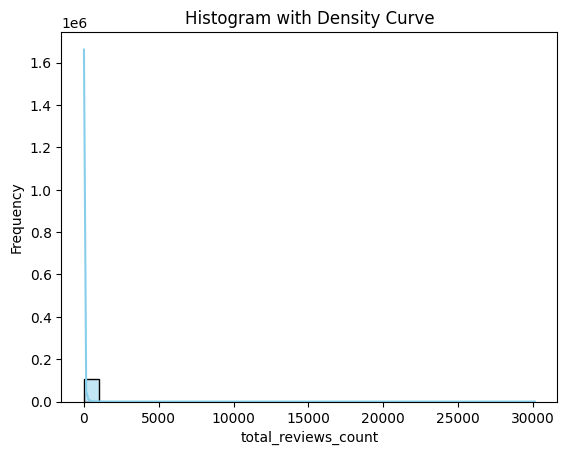

In [82]:
# total_reviews_count
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['total_reviews_count'], kde=True, color='skyblue', bins=30)
plt.title('Histogram with Density Curve')
plt.xlabel('total_reviews_count')
plt.ylabel('Frequency')
plt.show()

### total_reviews_count - Exploring

In [83]:
df['total_reviews_count'].head(10)

0    15.0
1    21.0
2     9.0
3     NaN
4    26.0
5    38.0
6    10.0
7     4.0
8     9.0
9     1.0
Name: total_reviews_count, dtype: float64

In [84]:
df['total_reviews_count_category'] = df['total_reviews_count'].apply(lambda x: 'up to 20' if x <= 20 else '20+')
df['total_reviews_count_category'].value_counts()

total_reviews_count_category
up to 20    66259
20+         49074
Name: count, dtype: int64

In [85]:
df.groupby('total_reviews_count_category')['avg_rating'].mean()


total_reviews_count_category
20+         4.036170
up to 20    4.071338
Name: avg_rating, dtype: float64

In [86]:
df.loc[df['total_reviews_count'].isna(), 'avg_rating'].count()


np.int64(0)

### Dropping Redundant / Temp Columns

In [87]:
# Dropping Redundant / Temp Columns

# redundant_columns = ['restaurant_link',    # unique values
#                     'country',            # common to all records
#                     'original_location',    # a duplicated feature
#                     'original_open_hours',
#                     'parsed_hours', 
#                     'awards',
#                     'popularity_detailed',
#                     'popularity_generic',
#                     'meals',
#                     'special_diets',
#                     'original_open_hours',
#                     'default_language',
#                     'merged_text',
#                     'parsed_hours',
#                     'price_range_has_data',
#                     'price_level_has_data',
#                     'features_list',
#                     'total_reviews_count_category',
#                     '1',
#                     '2']

# df = df.drop(redundant_columns, axis=1)


In [ ]:
df = df.drop('restaurant_link',  axis=1)
df = df.drop('country', axis=1)
df = df.drop('original_location', axis=1)    
df = df.drop('original_open_hours', axis=1)
df = df.drop('parsed_hours', axis=1)
df = df.drop('awards', axis=1)
df = df.drop('popularity_detailed', axis=1)
df = df.drop('meals', axis=1)
df = df.drop('special_diets', axis=1)
df = df.drop('default_language', axis=1)
df = df.drop('merged_text', axis=1)
df = df.drop('parsed_hours', axis=1)
df = df.drop('features_list', axis=1)
df = df.drop('total_reviews_count_category', axis=1)
df = df.drop(1, axis=1)
df = df.drop(2, axis=1)

### Filtering the Data:  total_reviews_count > 20

In [107]:
df = df[df['total_reviews_count'] > 20]

### Target Value - avg_rating

In [108]:
# Create a new column: 0 if not missing, 1 if missing
df['target_value'] = df['avg_rating']
df['flag'] = df['target_value'].isna().astype(int)

<Axes: xlabel='flag', ylabel='food'>

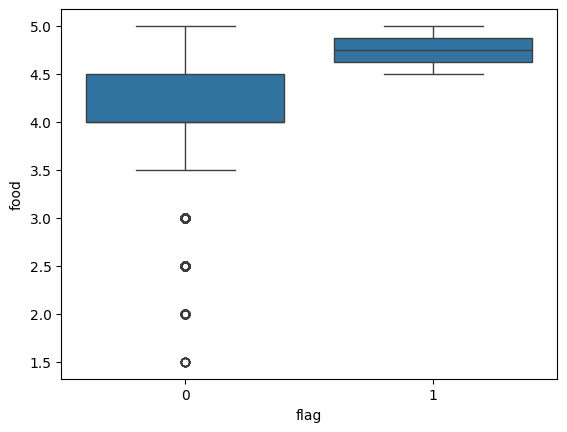

In [109]:
import seaborn as sns

# df['missing_target'] = df['avg_rating'].isnull()
sns.boxplot(x='flag', y='food', data=df)

In [110]:
df = df[df['total_reviews_count'] > 20]

In [118]:
df[['index', 'clean_text']].to_csv('clean_text.csv', index=False)

In [119]:
# df['total_reviews_count_category'].value_counts()

total_reviews_count_category
20+    39413
Name: count, dtype: int64

# Pickle file

In [112]:
import pickle

df.to_pickle('1_germany_data_prep.pkl')
df=pd.read_pickle('1_germany_data_prep.pkl')

In [113]:
import pickle
#Write a pickle file
with open('1_germany_data_prep.pkl', 'wb') as f:
    pickle.dump(df, f)

print("dataset saved as a pickle file.")

dataset saved as a pickle file.


In [114]:
import pickle

#Read a pickle file and load the data
with open('1_germany_data_prep.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [115]:
loaded_data.head()

,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,Brunch,Dinner,Drinks,Lunch,special_diets_any,special_diets_num,default_language_English,default_language_All,target_value,flag
1,185081,Schreyerhof,Southern Germany,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,48.996754,9.200803,0.0,2 of 2 places to eat in Hessigheim,Midrange German Vegetarian Friendly,...,0,1,0,0,1,2,1,0,3.5,0
4,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,50.765570,7.672825,1.0,1 of 1 places to eat in Hamm Sieg,Midrange French German Vegetarian Friendly,...,0,0,0,0,1,2,1,0,4.0,0
5,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,Rheingoenheimer Weg 1 67117 Limburgerhof Rhine...,49.426470,8.391160,0.0,4 of 13 places to eat in Limburgerhof,Midrange German Central European Vegetarian Fr...,...,1,1,0,0,1,2,1,0,4.0,0
11,185091,Medison,Rhineland‑West,Limburgerhof,Burgunder Platz 1 67117 Limburgerhof Rhineland...,49.422850,8.393550,1.0,9 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly Gluten Fr...,...,0,1,0,1,1,5,1,0,3.0,0
14,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,Mainzer Str 2 67117 Limburgerhof RhinelandPala...,49.423943,8.389733,1.0,3 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly,...,0,1,0,1,1,2,1,0,4.0,0


In [116]:
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39413 entries, 1 to 115332
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39413 non-null  int64  
 1   restaurant_name                    39413 non-null  object 
 2   region                             39413 non-null  object 
 3   city                               39413 non-null  object 
 4   address                            39413 non-null  object 
 5   latitude                           39391 non-null  float64
 6   longitude                          39391 non-null  float64
 7   claimed                            39289 non-null  float64
 8   popularity_generic                 39413 non-null  object 
 9   top_tags                           39413 non-null  object 
 10  price_level                        0 non-null      float64
 11  cuisines                           37314 non-null  object 

### city -- Fill missing by 'latitude' and 'longitude'

In [117]:
df['city_copy'] = df['city']

In [118]:
(df['city'] == 'NA').sum() # after select

np.int64(4682)

In [45]:
# !pip install geopy


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
'''
Only fills missing city values. Existing values remain untouched.
Uses cache dictionary (coords_cache) to avoid repeated API calls.
Cache can be saved to disk (coords_cache.pkl) and reloaded next time.
Handles large datasets safely (40k+ records).
Falls back to town, village, or state if city is missing.
'''


# =========================================================
# 2️⃣ Imports
# =========================================================
# import pandas as pd
# import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pickle  # for saving cache


# =========================================================
# 4️⃣ Initialize geolocator and RateLimiter
# =========================================================
geolocator = Nominatim(user_agent="my_t_app")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# =========================================================
# 5️⃣ Initialize cache dictionary
# Load existing cache if available
# =========================================================
cache_file = "coords_cache.pkl"

try:
    with open(cache_file, "rb") as f:
        coords_cache = pickle.load(f)
except FileNotFoundError:
    coords_cache = {}

# =========================================================
# 6️⃣ Function to safely get city from lat/lon with caching
# =========================================================
def get_city_cached(lat, lon):
    key = (lat, lon)
    if key in coords_cache:
        return coords_cache[key]  # return cached result

    try:
        location = reverse((lat, lon), language='en')
        if location is None:
            city = None
        else:
            address = location.raw.get('address', {})
            city = address.get('city') or address.get('town') or address.get('village') or address.get('state')
        coords_cache[key] = city  # save to cache
        return city
    except:
        coords_cache[key] = None
        return None

# =========================================================
# 7️⃣ Apply reverse geocoding only for missing city values
# =========================================================
mask_missing = df['city'].isna() | (df['city'].astype(str).str.strip().isin(['', 'NA', 'NaN']))
df.loc[mask_missing, 'city'] = df.loc[mask_missing].apply(
    lambda row: get_city_cached(row['latitude'], row['longitude']),
    axis=1
)

# =========================================================
# 8️⃣ Save updated cache to disk
# =========================================================
with open(cache_file, "wb") as f:
    pickle.dump(coords_cache, f)


In [120]:
(df['city'] == 'NA').sum() # after select

np.int64(0)

In [121]:
df['city'].value_counts()


city
Berlin         3244
Munich         1752
Hamburg        1427
Frankfurt      1075
Cologne         980
               ... 
Birkenhordt       1
Waal              1
Krummhoern        1
Achberg           1
Buren             1
Name: count, Length: 3745, dtype: int64

### Pickle file

In [122]:
df.to_pickle('1_germany_data_prep_1.pkl')
df=pd.read_pickle('1_germany_data_prep_1.pkl')

In [123]:
#Write a pickle file
with open('1_germany_data_prep.pkl', 'wb') as f:
    pickle.dump(df, f)
print("dataset saved as a pickle file.")

dataset saved as a pickle file.


### Filling city by address for a few records

In [124]:
# Filling city by address for a few records
df.loc[df["city"].isna() | (df["city"] == ""), ["address", "latitude", "longitude"]]

,address,latitude,longitude
33279,Lenaustr 1 12047 Berlin Germany,NaN,NaN
33577,Kantstr 46 10625 Berlin Germany,NaN,NaN
37803,Hindenburgdamm 57 A 12203 Berlin Germany,NaN,NaN
44745,Kirchenallee 45 20099 Hamburg Germany,NaN,NaN


In [125]:
# address == 'Lenaustr 1 12047 Berlin Germany'
df.loc[ df['address'] == 'Lenaustr 1 12047 Berlin Germany', 'city' ] = 'Berlin'
df.loc[ df['address'] == 'Lenaustr 1 12047 Berlin Germany', 'region' ] = 'Berlin'
df.loc[ df['address'] == 'Lenaustr 1 12047 Berlin Germany', 'latitude' ] = '52.4898'
df.loc[ df['address'] == 'Lenaustr 1 12047 Berlin Germany', 'longitude' ] = '13.42455'

# address == 'Kantstr 46 10625 Berlin Germany'
df.loc[ df['address'] == 'Kantstr 46 10625 Berlin Germany', 'city' ] = 'Berlin'
df.loc[ df['address'] == 'Kantstr 46 10625 Berlin Germany', 'region' ] = 'Berlin'
df.loc[ df['address'] == 'Kantstr 46 10625 Berlin Germany', 'latitude' ] = '52.5066'
df.loc[ df['address'] == 'Kantstr 46 10625 Berlin Germany', 'longitude' ] = '13.3125'

# address == 'Hindenburgdamm 57 A 12203 Berlin Germany'
df.loc[ df['address'] == 'Hindenburgdamm 57 A 12203 Berlin Germany', 'city' ] = 'Berlin'
df.loc[ df['address'] == 'Hindenburgdamm 57 A 12203 Berlin Germany', 'region' ] = 'Berlin'
df.loc[ df['address'] == 'Hindenburgdamm 57 A 12203 Berlin Germany', 'latitude' ] = '52.4458'
df.loc[ df['address'] == 'Hindenburgdamm 57 A 12203 Berlin Germany', 'longitude' ] = '13.3157'

# address == 'Lenaustr 1 12047 Berlin Germany'
df.loc[ df['address'] == 'Kirchenallee 45 20099 Hamburg Germany', 'city' ] = 'Hamburg'
df.loc[ df['address'] == 'Kirchenallee 45 20099 Hamburg Germany', 'region' ] = 'Northern and Hanseatic Coast'
df.loc[ df['address'] == 'Kirchenallee 45 20099 Hamburg Germany', 'latitude' ] = '53.55412'
df.loc[ df['address'] == 'Kirchenallee 45 20099 Hamburg Germany', 'longitude' ] = '10.00869'

In [126]:
# Check
df.loc[df["latitude"].isna() | (df["latitude"] == ""), ["address", "city", "region"]]

,address,city,region
9094,Balve North RhineWestphalia Germany,Balve,Rhineland‑West
21223,Grunwalderstrasse 2 79098 Freiburg im Breisgau...,Freiburg im Breisgau,Southern Germany
23329,N 3 5 68161 Mannheim BadenWürttemberg Germany,Mannheim,Southern Germany
24287,Wienerstrasse 86 70469 Stuttgart BadenWürttemb...,Stuttgart,Southern Germany
27194,Rindermarkt 6 80331 Munich Bavaria Germany,Munich,Southern Germany
28747,Hofmannstrasse 23 81379 Munich Bavaria Germany,Munich,Southern Germany
29197,Augustenstr 16 80333 Munich Bavaria Germany,Munich,Southern Germany
29673,Bayerstr 89 Corner HermannLinggStrasse 80335 M...,Munich,Southern Germany
45284,Elisabethenstr 45 61348 Bad Homburg Hesse Germany,Bad Homburg,Central Germany
47952,Opernplatz 10 60313 Frankfurt Hesse Germany,Frankfurt,Central Germany


In [127]:
import pandas as pd
from geopy.geocoders import Nominatim
import time

# List of addresses
addresses = [
    "Balve North RhineWestphalia Germany",
    "Grunwalderstrasse 2 79098 Freiburg im Breisgau Germany",
    "N 3 5 68161 Mannheim BadenWürttemberg Germany",
    "Wienerstrasse 86 70469 Stuttgart BadenWürttemberg Germany",
    "Rindermarkt 6 80331 Munich Bavaria Germany",
    "Hofmannstrasse 23 81379 Munich Bavaria Germany",
    "Augustenstr 16 80333 Munich Bavaria Germany",
    "Bayerstr 89 Corner HermannLinggStrasse 80335 Munich Bavaria Germany",
    "Elisabethenstr 45 61348 Bad Homburg Hesse Germany",
    "Opernplatz 10 60313 Frankfurt Hesse Germany",
    "Hohenzollernstr 10 58095 Hagen North RhineWestphalia Germany",
    "Schlossstr 27 56068 Koblenz RhinelandPalatine Germany",
    "Welschnonnengasse 1 55116 Mainz RhinelandPalatine Germany",
    "Koenigstr 6 01097 Dresden Saxony Germany",
    "Piltzergasse 8 29221 Celle Lower Saxony Germany",
    "Lindenstr 3 83043 Bad Aibling Bavaria Germany",
    "Freibadstr 14 87527 Sonthofen Bavaria Germany",
    "Am Marktplatz 1 65779 Kelkheim Taunus Hesse Germany"
]

# Initialize geolocator
geolocator = Nominatim(user_agent="geo_filler")

# Function to fill missing coordinates
def fill_missing_coords(row):
    if pd.isna(row["latitude"]) or pd.isna(row["longitude"]):
        try:
            location = geolocator.geocode(row["address"])
            if location:
                return pd.Series([location.latitude, location.longitude])
        except Exception as e:
            print(f"Error geocoding {row['address']}: {e}")
    return pd.Series([row["latitude"], row["longitude"]])

# Apply function to DataFrame
df[["latitude", "longitude"]] = df.apply(fill_missing_coords, axis=1)

# Optional: slow down requests to avoid being blocked
time.sleep(1)

In [128]:
# address == 'Balve North RhineWestphalia Germany'
df.loc[ df['address'] == 'Balve North RhineWestphalia Germany', 'latitude' ] = '51.3315'
df.loc[ df['address'] == 'Balve North RhineWestphalia Germany', 'longitude' ] = '7.86424'

# address == 'Grunwalderstrasse 2 79098 Freiburg im Breisgau BadenWÃürttemberg Germany'
df.loc[df["address"].str.contains('Grunwalderstrasse 2 79098 Freiburg im Breisgau.', case=False, na=False), 'latitude' ] = '47.9948'
df.loc[df["address"].str.contains('Grunwalderstrasse 2 79098 Freiburg im Breisgau.', case=False, na=False), 'longitude' ] = '7.8501'

# address == 'N 3 5 68161 Mannheim BadenWürttemberg Germany'
df.loc[df["address"].str.contains('N 3 5 68161 Mannheim Baden', case=False, na=False), 'latitude' ] = '49.4870'
df.loc[df["address"].str.contains('N 3 5 68161 Mannheim Baden', case=False, na=False), 'longitude' ] = '8.4690'

# address == 'Wienerstrasse 86 70469 Stuttgart BadenWürttemberg Germany'
df.loc[df["address"].str.contains('Wienerstrasse 86 70469 Stuttgart BadenW', case=False, na=False), 'latitude' ] = '48.8167'
df.loc[df["address"].str.contains('Wienerstrasse 86 70469 Stuttgart BadenW', case=False, na=False), 'longitude' ] = '9.1500'

# address == 'Bayerstr 89 Corner HermannLinggStrasse 80335 M'
df.loc[df["address"].str.contains('Bayerstr 89 Corner HermannLinggStrasse 80335 M', case=False, na=False), 'latitude' ] = '48.1390'
df.loc[df["address"].str.contains('Bayerstr 89 Corner HermannLinggStrasse 80335 M', case=False, na=False), 'longitude' ] = '11.5521'

# address == 'Hohenzollernstr 10 58095 Hagen North RhineWest'
df.loc[df["address"].str.contains('Hohenzollernstr 10 58095 Hagen North RhineWest', case=False, na=False), 'latitude' ] = '51.3587'
df.loc[df["address"].str.contains('Hohenzollernstr 10 58095 Hagen North RhineWest', case=False, na=False), 'longitude' ] = '7.4690'

# address == 'Schlossstr 27 56068 Koblenz RhinelandPalatinat'
df.loc[df["address"].str.contains('Schlossstr 27 56068 Koblenz RhinelandPalatinat', case=False, na=False), 'latitude' ] = '50.3569'
df.loc[df["address"].str.contains('Schlossstr 27 56068 Koblenz RhinelandPalatinat', case=False, na=False), 'longitude' ] = '7.5945'

# address == 'Welschnonnengasse 1 55116 Mainz RhinelandPalat'
df.loc[df["address"].str.contains('Welschnonnengasse 1 55116 Mainz RhinelandPalat', case=False, na=False), 'latitude' ] = '50.00004'
df.loc[df["address"].str.contains('Welschnonnengasse 1 55116 Mainz RhinelandPalat', case=False, na=False), 'longitude' ] = '8.26691'

# address == 'Grunwalderstrasse 2 79098 Freiburg im Breisgau BadenWÃürttemberg Germany'
df.loc[df["address"].str.contains('Grunwalderstrasse 2 79098 Freiburg im Breisgau.', case=False, na=False), 'latitude' ] = '47.9948'
df.loc[df["address"].str.contains('Grunwalderstrasse 2 79098 Freiburg im Breisgau.', case=False, na=False), 'longitude' ] = '7.8501'

# address == 'Koenigstr 6 01097 Dresden Saxony Germany'
df.loc[df["address"].str.contains('Koenigstr 6 01097 Dresden Saxony Germany', case=False, na=False), 'latitude' ] = '51.0609'
df.loc[df["address"].str.contains('Koenigstr 6 01097 Dresden Saxony Germany', case=False, na=False), 'longitude' ] = '13.7414'

In [129]:
# Check
df.loc[df["latitude"].isna() | (df["latitude"] == ""), ["address", "city", "region"]]

,address,city,region


In [131]:
df.to_pickle('1_germany_data_prep_2.pkl')
df=pd.read_pickle('1_germany_data_prep_2.pkl')

In [132]:
#Write a pickle file
with open('1_germany_data_prep_2', 'wb') as f:
    pickle.dump(df, f)
print("dataset saved as a pickle file.")

dataset saved as a pickle file.


In [ ]:
['index', 'restaurant_name', 'special_diets']

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39413 entries, 1 to 115332
Data columns (total 70 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              39413 non-null  int64  
 1   restaurant_name                    39413 non-null  object 
 2   region                             39413 non-null  object 
 3   city                               39413 non-null  object 
 4   address                            39413 non-null  object 
 5   latitude                           39413 non-null  object 
 6   longitude                          39413 non-null  object 
 7   claimed                            39289 non-null  float64
 8   popularity_generic                 39413 non-null  object 
 9   top_tags                           39413 non-null  object 
 10  price_level                        0 non-null      float64
 11  cuisines                           37314 non-null  object 

### Left Join
### Bringing back from the germany_original some dropped features

In [136]:
# Load the CSV
germany = pd.read_csv('germany_original.csv')

# Select only the columns you want to bring: index + features
features_to_merge = ['index', 'special_diets']
germany_subset = germany[features_to_merge]

# Merge with df on 'index', keeping only rows in df
df_merged = df.merge(germany_subset, on='index', how='left')

df_merged

,index,restaurant_name,region,city,address,latitude,longitude,claimed,popularity_generic,top_tags,...,Drinks,Lunch,special_diets_any,special_diets_num,default_language_English,default_language_All,target_value,flag,city_copy,special_diets
0,185081,Schreyerhof,Southern Germany,Hessigheim,Schreyerhof 30 74394 Hessigheim BadenWürttembe...,48.996754,9.200803,0.0,2 of 2 places to eat in Hessigheim,Midrange German Vegetarian Friendly,...,0,0,1,2,1,0,3.5,0,Hessigheim,Vegetarian Friendly
1,185084,Romantik Hotel Alte Vogtei,Rhineland‑West,Hamm Sieg,Lindenallee 3 57577 Hamm Sieg RhinelandPalatin...,50.76557,7.672825,1.0,1 of 1 places to eat in Hamm Sieg,Midrange French German Vegetarian Friendly,...,0,0,1,2,1,0,4.0,0,Hamm Sieg,Vegetarian Friendly
2,185085,Stefans Restaurant im Limburgerhof,Rhineland‑West,Limburgerhof,Rheingoenheimer Weg 1 67117 Limburgerhof Rhine...,49.42647,8.39116,0.0,4 of 13 places to eat in Limburgerhof,Midrange German Central European Vegetarian Fr...,...,0,0,1,2,1,0,4.0,0,Limburgerhof,Vegetarian Friendly
3,185091,Medison,Rhineland‑West,Limburgerhof,Burgunder Platz 1 67117 Limburgerhof Rhineland...,49.42285,8.39355,1.0,9 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly Gluten Fr...,...,0,1,1,5,1,0,3.0,0,Limburgerhof,"Vegetarian Friendly, Gluten Free Options"
4,185094,Ristorante Capri,Rhineland‑West,Limburgerhof,Mainzer Str 2 67117 Limburgerhof RhinelandPala...,49.423943,8.389733,1.0,3 of 13 places to eat in Limburgerhof,Midrange Italian Vegetarian Friendly,...,0,1,1,2,1,0,4.0,0,Limburgerhof,Vegetarian Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39408,300390,Joe Peñas,Southern Germany,Schorndorf,Rosenstr 5153 73614 Schorndorf 73614 Schorndor...,48.80478,9.52155,1.0,6 of 57 places to eat in Schorndorf,Midrange Mexican Steakhouse Latin,...,0,0,1,2,0,1,4.0,0,Schorndorf,Vegetarian Friendly
39409,300392,Burgerstuble,Southern Germany,Schorndorf,Pfarrstr 32 73614 Schorndorf BadenWürttemberg ...,48.795975,9.502259,0.0,2 of 57 places to eat in Schorndorf,Midrange German Vegetarian Friendly,...,0,1,1,2,0,1,4.5,0,Schorndorf,Vegetarian Friendly
39410,300398,Restaurant Dimitra,Southern Germany,Schorndorf,Gmuender Str 6 73614 Schorndorf BadenWürttembe...,48.80525,9.53257,1.0,11 of 57 places to eat in Schorndorf,Midrange Greek Vegetarian Friendly Vegan Options,...,0,1,1,4,1,0,4.0,0,Schorndorf,"Vegetarian Friendly, Vegan Options"
39411,300402,Gasthaus Zum Lamm Schornbach,Southern Germany,Schorndorf,Talauenstr 2 73614 Schorndorf BadenWürttemberg...,48.83085,9.5116,0.0,5 of 57 places to eat in Schorndorf,Midrange German South American Vegetarian Frie...,...,0,1,1,2,0,1,4.5,0,Schorndorf,Vegetarian Friendly


In [137]:
df_merged['special_diets'].value_counts()

special_diets
Vegetarian Friendly                                                       25502
Vegetarian Friendly, Vegan Options                                         5394
Vegetarian Friendly, Vegan Options, Gluten Free Options                    2569
Vegetarian Friendly, Gluten Free Options                                   1130
Vegetarian Friendly, Gluten Free Options, Vegan Options                     213
Vegan Options, Vegetarian Friendly                                           95
Vegetarian Friendly, Vegan Options, Halal                                    56
Vegetarian Friendly, Halal                                                   54
Gluten Free Options                                                          46
Vegetarian Friendly, Vegan Options, Halal, Gluten Free Options               35
Vegan Options                                                                27
Vegan Options, Vegetarian Friendly, Gluten Free Options                      24
Gluten Free Options, Veget

In [138]:
df = df_merged

In [139]:
# Count number of items separated by commas in 'special_diets'
df['special_diets_num'] = df['special_diets'].apply(lambda x: len(str(x).split(',')))

df[['special_diets', 'special_diets_num']].head()

,special_diets,special_diets_num
0,Vegetarian Friendly,1
1,Vegetarian Friendly,1
2,Vegetarian Friendly,1
3,"Vegetarian Friendly, Gluten Free Options",2
4,Vegetarian Friendly,1


In [140]:
df.drop(columns=['special_diets'], inplace=True)

In [141]:
df.to_pickle('1_germany_data_prep_3.pkl')
df=pd.read_pickle('1_germany_data_prep_3.pkl')

In [142]:
#Write a pickle file
with open('1_germany_data_prep_3.pkl', 'wb') as f:
    pickle.dump(df, f)
print("dataset saved as a pickle file.")

dataset saved as a pickle file.
